## Modelos  Predicción de datos de Series Temporales.

## Trafico de Madrid. Interior de M30 
### (40 estaciones de  aforo)

In [1]:
## realizamos predicción a la suma de los 40 aforos diarios en la ciudad.
## zona interior a la M-30 en Madrid. (no está incluida Madrid Central)
## el indice que nos da en un dato de la MOVILIDAD del trafico de Madrid.
## día a día.

## Modelo 1. Exponential Smoothing.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# buscamos el archivo con los datos y indexamos la fecha.
df = pd.read_csv('TrafMadridintM30.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()

,ID
FDIA,
2020-01-01,1700376.0
2020-01-02,2878926.0
2020-01-03,2734260.0
2020-01-04,2189156.0
2020-01-05,1792834.0


In [4]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', name='FDIA', length=578, freq='D')

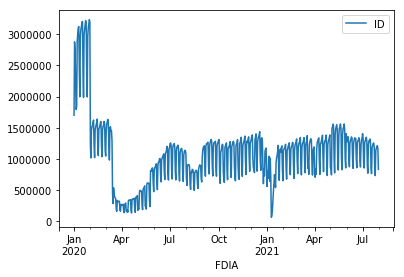

In [5]:
df.plot();

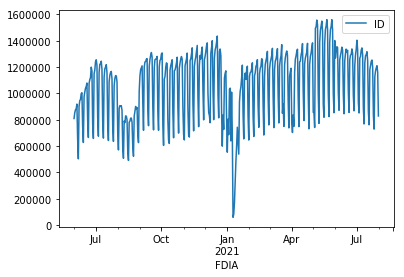

In [6]:
# para una predicción del mes siguiente al último que tenemos,
# no utilizamos los datos antes del 01/06/2021.
df1 = df.iloc[152:]
df1.plot();

In [7]:
len(df1)

426

In [8]:
train = df1.iloc[:395] 
test = df1.iloc[395:]
# el test en con los datos del mes de julio (31 días).

In [9]:
# generamos el modelo.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

test_predictions = fitted_model.forecast(31)
test_predictions

2021-07-01    1.341644e+06
2021-07-02    1.312307e+06
2021-07-03    9.886083e+05
2021-07-04    8.483144e+05
2021-07-05    1.244585e+06
2021-07-06    1.315650e+06
2021-07-07    1.339385e+06
2021-07-08    1.352768e+06
2021-07-09    1.323431e+06
2021-07-10    9.997327e+05
2021-07-11    8.594388e+05
2021-07-12    1.255709e+06
2021-07-13    1.326775e+06
2021-07-14    1.350509e+06
2021-07-15    1.363893e+06
2021-07-16    1.334556e+06
2021-07-17    1.010857e+06
2021-07-18    8.705632e+05
2021-07-19    1.266834e+06
2021-07-20    1.337899e+06
2021-07-21    1.361633e+06
2021-07-22    1.375017e+06
2021-07-23    1.345680e+06
2021-07-24    1.021981e+06
2021-07-25    8.816876e+05
2021-07-26    1.277958e+06
2021-07-27    1.349024e+06
2021-07-28    1.372758e+06
2021-07-29    1.386142e+06
2021-07-30    1.356804e+06
2021-07-31    1.033106e+06
Freq: D, dtype: float64

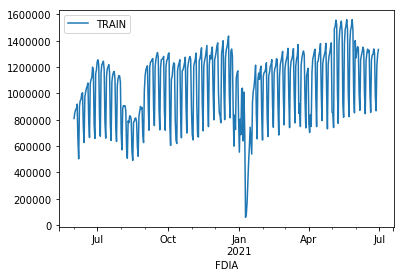

In [10]:
# pintamos los resultados en varias graficas para ver la previsión mejor.
train['ID'].plot(legend=True,label='TRAIN')

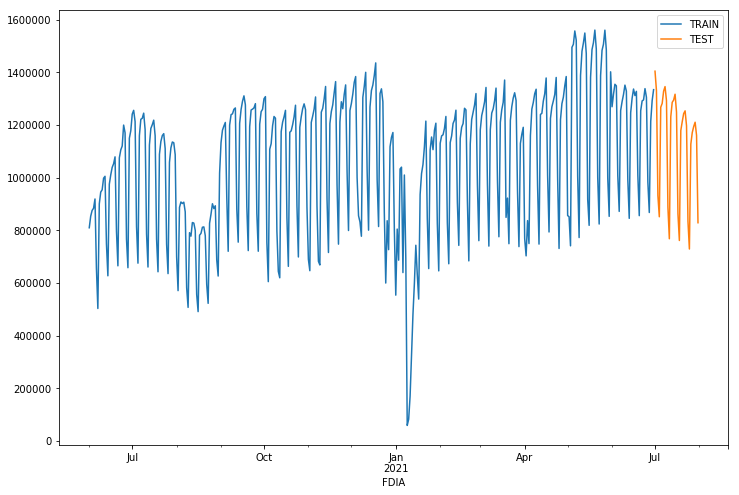

In [11]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')

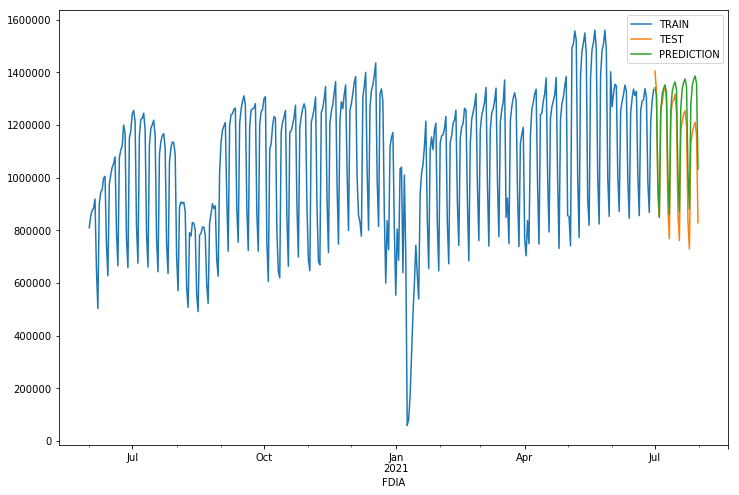

In [12]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

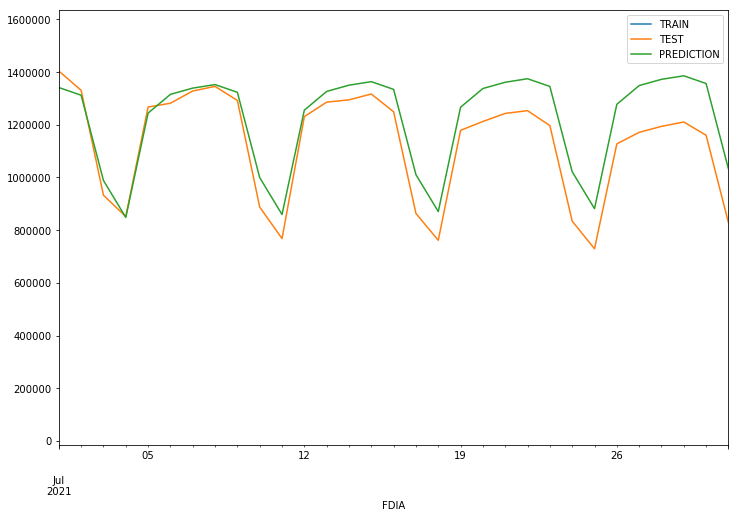

In [13]:
# pintamos los datos de predicción en el mes de julio.
train['ID'].plot(legend=True,label='TRAIN')
test['ID'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-07-01','2021-07-31']);

In [14]:
# evaluamos la métrica de los resultados.
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test_predictions)

96199.94471166718

In [15]:
test['ID'].describe()

count    3.100000e+01
mean     1.130270e+06
std      2.071925e+05
min      7.291990e+05
25%      9.101755e+05
50%      1.210620e+06
75%      1.284075e+06
max      1.404377e+06
Name: ID, dtype: float64

In [16]:
np.sqrt(mean_squared_error(test['ID'],test_predictions))

114887.73183259723

In [17]:
# error sqrt. respecto a la media del valor de los datos.
114887*100/1130270

10.164562449680165

In [18]:
# el error en la predicción del test es del 10.2%, es un poco alto para el tipo
# de datos que manejamos.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

In [19]:
# predecimos los datos con este modelo para agosto. con este error.

fitted_pred31 = ExponentialSmoothing(df1['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

pred31 = fitted_pred31.forecast(31)
pred31

2021-08-01    6.892646e+05
2021-08-02    1.089967e+06
2021-08-03    1.155623e+06
2021-08-04    1.181592e+06
2021-08-05    1.193537e+06
2021-08-06    1.171115e+06
2021-08-07    8.325803e+05
2021-08-08    6.907290e+05
2021-08-09    1.091431e+06
2021-08-10    1.157087e+06
2021-08-11    1.183057e+06
2021-08-12    1.195002e+06
2021-08-13    1.172580e+06
2021-08-14    8.340447e+05
2021-08-15    6.921934e+05
2021-08-16    1.092895e+06
2021-08-17    1.158552e+06
2021-08-18    1.184521e+06
2021-08-19    1.196466e+06
2021-08-20    1.174044e+06
2021-08-21    8.355091e+05
2021-08-22    6.936578e+05
2021-08-23    1.094360e+06
2021-08-24    1.160016e+06
2021-08-25    1.185986e+06
2021-08-26    1.197930e+06
2021-08-27    1.175509e+06
2021-08-28    8.369735e+05
2021-08-29    6.951221e+05
2021-08-30    1.095824e+06
2021-08-31    1.161480e+06
Freq: D, dtype: float64

In [20]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 1.

pred31.to_csv('Pred08Mod1trafMadridintM30.csv')

## Modelo 2. SARIMAX

In [7]:
# al tener modelos más complejos, retiramos los avisos warnings.
import warnings
warnings.filterwarnings("ignore")

In [8]:
# los datos ya los tenemos en 'df', y del mismo modo trabajamos con 'df1'
# datos desde el 01/06/2020 (asi no influye la bajada de trafico del periodo de
# alarma de covid en marzo-abril-mayo de 2020)

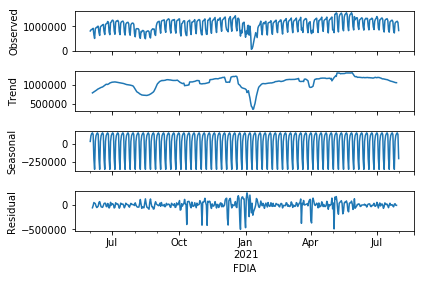

In [9]:
# representamos la descomposición estacional.
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df1['ID'])
result.plot();

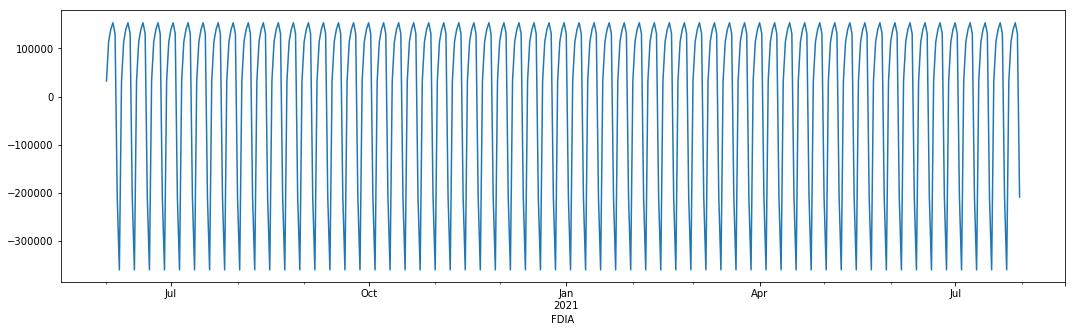

In [10]:
# puede que haya estacinalidad a nivel semanal.
result.seasonal.plot(figsize=(18,5));

In [11]:
len(df1)

426

In [12]:
# vamos a pronosticar los datos de julio2021. 31 días.
# realizamos los archivos de 'train' y 'test', este último es el mes de junio.
# retiramos datos antes de mayo2021, para que no influya los datos del covid.
train = df1.iloc[:395]
test = df1.iloc[395:]

In [13]:
# 1º pronostico. Modelo SARIMA. Obtenemos valores del modelo.
from pmdarima import auto_arima 

auto_arima(df1['ID'],seasonal=True,m=7).summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  426
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5688.505
Date:                           Sun, 12 Sep 2021   AIC                          11391.010
Time:                                   13:30:24   BIC                          11419.374
Sample:                                        0   HQIC                         11402.215
                                           - 426                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    299.7514    950.887      0.315      0.753   -1563.953    2163.456
ar.L1          0.3659      0.292      1.253      0.210      -0.207       0.938
ar.L2         -0.0836      0.165     -0.507      0.612      -0.406       0.239
ma.L1         -0.7063      0.282     -2.503      0.012      -1.259      -0.153
ar.S.L7        0.9896      0.014     73.237      0.000       0.963       1.016
ma.S.L7       -0.8759      0.077    -11.403      0.000      -1.026      -0.725
sigma2      4.928e+10   5.46e-05   9.02e+14      0.000    4.93e+10    4.93e+10
===================================================================================
Ljung-Box (Q):                       44.04   Jarque-Bera (JB):               669.31
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.68e+30. Standard errors may be unstable.
"""

In [14]:
# ahora generamos nuestro modelo utilizando los indicadores de SARIMAX.

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ID'],order=(2,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                ID   No. Observations:                  395
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5280.276
Date:                           Sun, 12 Sep 2021   AIC                          10572.552
Time:                                   13:30:37   BIC                          10596.410
Sample:                               06-01-2020   HQIC                         10582.006
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6714      0.096      6.989      0.000       0.483       0.860
ar.L2          0.1172      0.121      0.967      0.333      -0.120       0.355
ma.L1         -0.9970      0.013    -76.556      0.000      -1.023      -0.971
ar.S.L7        0.9919      0.011     89.191      0.000       0.970       1.014
ma.S.L7       -0.8822      0.075    -11.785      0.000      -1.029      -0.735
sigma2      5.009e+10   1.21e-12   4.13e+22      0.000    5.01e+10    5.01e+10
===================================================================================
Ljung-Box (Q):                       56.60   Jarque-Bera (JB):               667.30
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.93e+38. Standard errors may be unstable.
"""

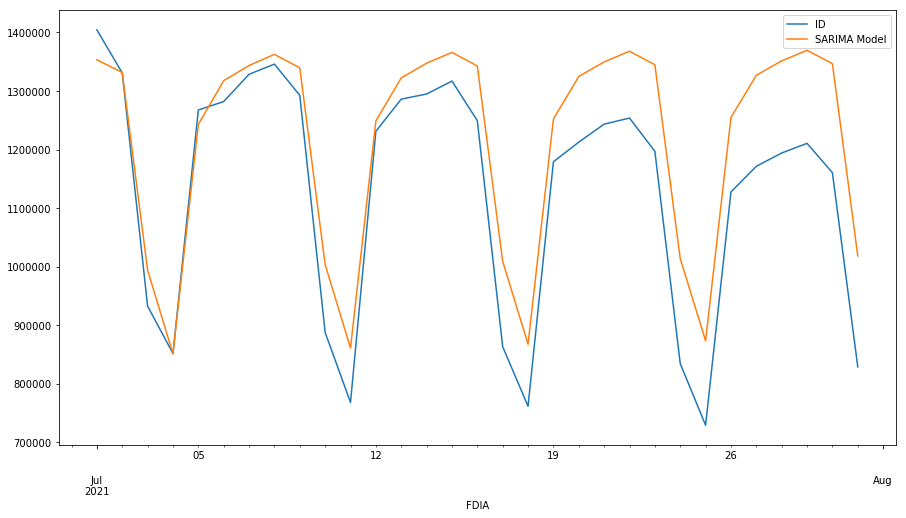

In [15]:
# predecimos los valores (últimos 31 dias, corresponde a datos de juLio)
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start,end).rename('SARIMA Model')

# y lo pintamos junto a los datos reales del 'test'
test['ID'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [16]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],predictions)

90742.31947340035

In [31]:
test['ID'].describe()

count    3.100000e+01
mean     1.130270e+06
std      2.071925e+05
min      7.291990e+05
25%      9.101755e+05
50%      1.210620e+06
75%      1.284075e+06
max      1.404377e+06
Name: ID, dtype: float64

In [32]:
np.sqrt(mean_squared_error(test['ID'],predictions))

107854.36791684596

In [33]:
# error sqrt.
107854*100/1130270

9.542321746131455

In [20]:
# el error en la predicción del test es del 9,5%, un poco mejor que el modelo
# anterior
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

# vamos a seguir estudiando otros modelos y elegimos aquel que nos de mejor
# predicción en el test, para realizar la PREDICCIÓN del MES siguiente: AGOSTO.

In [34]:
# predecimos los datos con este modelo para agosto. modelo 2.
dias= 31

model2 = SARIMAX(df1['ID'],order=(2,1,1),seasonal_order=(2,0,1,7),enforce_invertibility=False)
predic2 = model2.fit()
start=len(df1)
end=len(df1)+dias-1

predicmodel2 = predic2.predict(start,end).rename('SARIMA Model')
predicmodel2


2021-08-01    7.281480e+05
2021-08-02    1.133571e+06
2021-08-03    1.208636e+06
2021-08-04    1.243738e+06
2021-08-05    1.270385e+06
2021-08-06    1.240171e+06
2021-08-07    9.136564e+05
2021-08-08    7.946141e+05
2021-08-09    1.186886e+06
2021-08-10    1.257562e+06
2021-08-11    1.286800e+06
2021-08-12    1.308900e+06
2021-08-13    1.277789e+06
2021-08-14    9.496303e+05
2021-08-15    8.241173e+05
2021-08-16    1.209420e+06
2021-08-17    1.276870e+06
2021-08-18    1.303180e+06
2021-08-19    1.322988e+06
2021-08-20    1.290835e+06
2021-08-21    9.629792e+05
2021-08-22    8.360546e+05
2021-08-23    1.217753e+06
2021-08-24    1.283857e+06
2021-08-25    1.309142e+06
2021-08-26    1.328149e+06
2021-08-27    1.295730e+06
2021-08-28    9.692109e+05
2021-08-29    8.424270e+05
2021-08-30    1.221628e+06
2021-08-31    1.287092e+06
Freq: D, Name: SARIMA Model, dtype: float64

In [35]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 2.

predicmodel2.to_csv('Pred08Mod2trafMadridintM30.csv')

## Modelo 3. RNN

In [7]:
# uso de redes neuronales para predecir datos de una serie temporal

# ya tengo la base de datos 'df', reducida a 'df1' para el trabajo.
df1.head()

,ID
FDIA,
2020-06-01,809882.0
2020-06-02,853636.0
2020-06-03,875781.0
2020-06-04,883901.0
2020-06-05,919118.0


In [8]:
# definimos nuestros paquetes de datos de entrenamiento y test.
# realmente ya los tenemos definidos de los modelos anteriores, pero por si acaso.
len(df1)

426

In [9]:
# tomamos 31 dias de test (7,3% de los datos)
train = df1.iloc[:395]
test = df1.iloc[395:]
test

,ID
FDIA,
2021-07-01,1404377.0
2021-07-02,1330972.0
2021-07-03,932628.0
2021-07-04,851638.0
2021-07-05,1267515.0
2021-07-06,1282012.0
2021-07-07,1328521.0
2021-07-08,1345921.0
2021-07-09,1292555.0


In [10]:
# normalizamos los datos entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [11]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
# ahora generamos el modelo con RNN
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_test

array([[0.8960127 ],
       [0.84711493],
       [0.5817633 ],
       [0.52781288],
       [0.80484388],
       [0.81450087],
       [0.84548223],
       [0.85707301],
       [0.82152395],
       [0.55185043],
       [0.47218046],
       [0.78066977],
       [0.81724935],
       [0.82305273],
       [0.83778568],
       [0.79274817],
       [0.53560735],
       [0.46780394],
       [0.74595938],
       [0.76833425],
       [0.78874469],
       [0.79571914],
       [0.75789655],
       [0.51639862],
       [0.44625175],
       [0.71166932],
       [0.7408168 ],
       [0.75597808],
       [0.76694402],
       [0.73349862],
       [0.51272088]])

In [13]:
# creamos el modelo.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# definimos el modelo RNN, con la estacionalidad semanal.
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit_generator(generator,epochs=25)

C:\Users\ahija\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
388/388 [==============================] - 2s 3ms/step - loss: 0.0372
Epoch 2/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0182
Epoch 3/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0151
Epoch 4/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0132
Epoch 5/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0137
Epoch 6/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0121
Epoch 7/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 8/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 9/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0115
Epoch 10/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0113
Epoch 11/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0100
Epoch 12/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0105
Epoch 13/25
388/388 [====

In [17]:
model.history.history.keys()

dict_keys(['loss'])

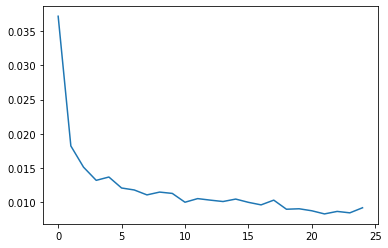

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [19]:
# vemos que el error de predicción baja hasta 0

In [20]:
# hacemos ahora la predicción usando el modelo RNN
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    # y volvemos a ejecutar

In [21]:
# ahora tengo mis datos de test_predictions
test_predictions

[array([0.8264491], dtype=float32),
 array([0.7627088], dtype=float32),
 array([0.5678201], dtype=float32),
 array([0.4673038], dtype=float32),
 array([0.6947947], dtype=float32),
 array([0.7792985], dtype=float32),
 array([0.8097172], dtype=float32),
 array([0.7926087], dtype=float32),
 array([0.7117143], dtype=float32),
 array([0.51371443], dtype=float32),
 array([0.41919953], dtype=float32),
 array([0.62327874], dtype=float32),
 array([0.7323559], dtype=float32),
 array([0.7705435], dtype=float32),
 array([0.75540495], dtype=float32),
 array([0.66426677], dtype=float32),
 array([0.46935713], dtype=float32),
 array([0.3841648], dtype=float32),
 array([0.5541114], dtype=float32),
 array([0.6846083], dtype=float32),
 array([0.7313364], dtype=float32),
 array([0.7182597], dtype=float32),
 array([0.6200563], dtype=float32),
 array([0.43671757], dtype=float32),
 array([0.36524183], dtype=float32),
 array([0.49648428], dtype=float32),
 array([0.6403682], dtype=float32),
 array([0.69711906]

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[1299948.59807605],
       [1204262.08630288],
       [ 911696.51760721],
       [ 760802.21220404],
       [1102309.96177059],
       [1229166.42957991],
       [1274830.76011086],
       [1249147.59966463],
       [1127709.56619555],
       [ 830473.51039279],
       [ 688588.39449984],
       [ 994950.67713559],
       [1158696.53956729],
       [1216023.53193754],
       [1193297.62188673],
       [1056481.61792725],
       [ 763884.64242709],
       [ 635994.52388954],
       [ 891117.18658775],
       [1087018.15866691],
       [1157166.10656387],
       [1137535.4221009 ],
       [ 990113.13446152],
       [ 714886.35880286],
       [ 607587.47186881],
       [ 804607.72519445],
       [1020605.29407573],
       [1105799.24880296],
       [1085773.78707087],
       [ 927144.54943073],
       [ 675435.56479108]])

In [23]:
test['predictions'] = true_predictions

<ipython-input-23-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [24]:
test

,ID,predictions
FDIA,,
2021-07-01,1404377.0,1.299949e+06
2021-07-02,1330972.0,1.204262e+06
2021-07-03,932628.0,9.116965e+05
2021-07-04,851638.0,7.608022e+05
2021-07-05,1267515.0,1.102310e+06
2021-07-06,1282012.0,1.229166e+06
2021-07-07,1328521.0,1.274831e+06
2021-07-08,1345921.0,1.249148e+06
2021-07-09,1292555.0,1.127710e+06


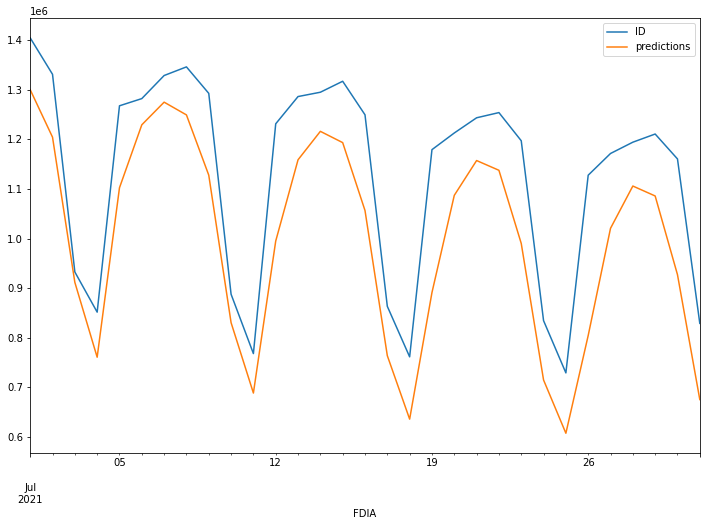

In [25]:
test.plot(figsize=(12,8))

In [26]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test['predictions'])

133396.78065826432

In [27]:
test['ID'].describe()

count    3.100000e+01
mean     1.130270e+06
std      2.071925e+05
min      7.291990e+05
25%      9.101755e+05
50%      1.210620e+06
75%      1.284075e+06
max      1.404377e+06
Name: ID, dtype: float64

In [28]:
np.sqrt(mean_squared_error(test['ID'],test['predictions']))

149328.78841298693

In [31]:
# error sqrt.
149328*100/1130270

13.211710476257885

In [32]:
# en este caso el error de predicción es mayor, hasta un 13.2% que los modelos
# anteriores.

## Modelo 4. Facebook's Prophet

In [33]:
# Usamos la bibliote de predicciones de la libreria de Facebook.
# diseñada para conjunto de datos comerciales comunes en Facebook.

In [5]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [6]:
# realizamos la carga del archivo
df = pd.read_csv('TrafMadridintM30.csv')

In [7]:
# cambiamos la columna de FDIA al formato datatime y lo pasamos a indice, 
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])

In [8]:
df1 = df.iloc[152:]
df1.head()

,ds,y
152,2020-06-01,809882.0
153,2020-06-02,853636.0
154,2020-06-03,875781.0
155,2020-06-04,883901.0
156,2020-06-05,919118.0


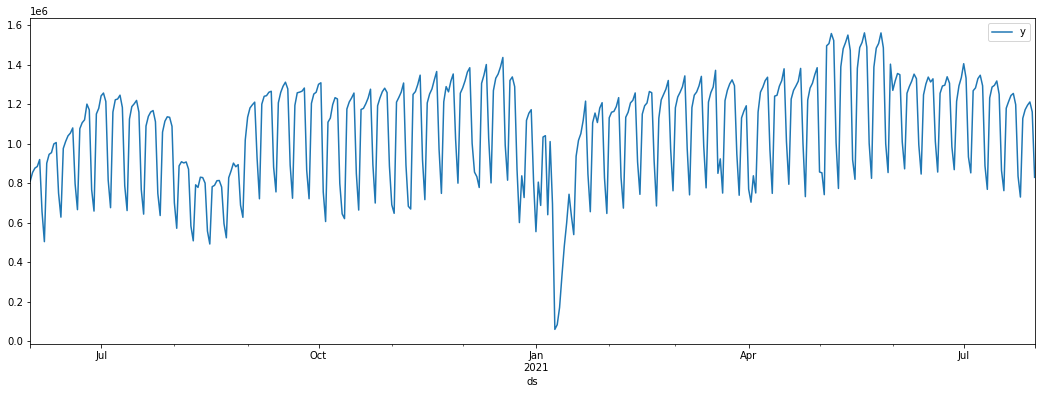

In [9]:
df1.plot(x='ds',y='y',figsize=(18,6))

In [10]:
len(df1)

426

In [11]:
train = df1.iloc[:395]
test = df1.iloc[395:]

In [12]:
# genero el modelo de predicción
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=31,freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
421,2021-07-27,1.284169e+06,1.189253e+06,1.607763e+06,1.283120e+06,1.285113e+06,112355.846930,112355.846930,112355.846930,112355.846930,112355.846930,112355.846930,0.0,0.0,0.0,1.396525e+06
422,2021-07-28,1.285436e+06,1.212598e+06,1.654596e+06,1.284320e+06,1.286437e+06,137429.391447,137429.391447,137429.391447,137429.391447,137429.391447,137429.391447,0.0,0.0,0.0,1.422866e+06
423,2021-07-29,1.286703e+06,1.194123e+06,1.651834e+06,1.285510e+06,1.287744e+06,151728.753811,151728.753811,151728.753811,151728.753811,151728.753811,151728.753811,0.0,0.0,0.0,1.438432e+06
424,2021-07-30,1.287971e+06,1.198155e+06,1.646442e+06,1.286717e+06,1.289065e+06,132019.047033,132019.047033,132019.047033,132019.047033,132019.047033,132019.047033,0.0,0.0,0.0,1.419990e+06
425,2021-07-31,1.289238e+06,8.576021e+05,1.295750e+06,1.287888e+06,1.290400e+06,-203720.017343,-203720.017343,-203720.017343,-203720.017343,-203720.017343,-203720.017343,0.0,0.0,0.0,1.085518e+06


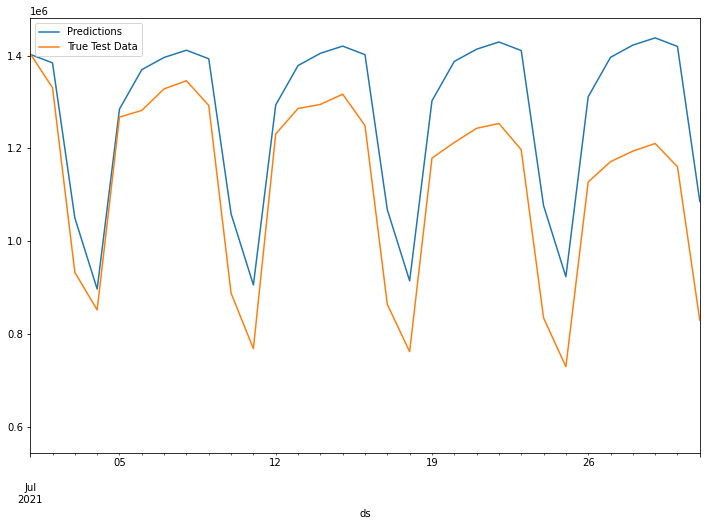

In [14]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-07-01','2021-07-31'))

In [15]:
# evaluamos la predicción
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-31:]['yhat']
predictions

395    1.402953e+06
396    1.384511e+06
397    1.050039e+06
398    8.966414e+05
399    1.284864e+06
400    1.369916e+06
401    1.396256e+06
402    1.411823e+06
403    1.393380e+06
404    1.058908e+06
405    9.055111e+05
406    1.293734e+06
407    1.378786e+06
408    1.405126e+06
409    1.420693e+06
410    1.402250e+06
411    1.067778e+06
412    9.143809e+05
413    1.302604e+06
414    1.387655e+06
415    1.413996e+06
416    1.429562e+06
417    1.411120e+06
418    1.076648e+06
419    9.232506e+05
420    1.311474e+06
421    1.396525e+06
422    1.422866e+06
423    1.438432e+06
424    1.419990e+06
425    1.085518e+06
Name: yhat, dtype: float64

In [16]:
test['y']

547    1404377.0
548    1330972.0
549     932628.0
550     851638.0
551    1267515.0
552    1282012.0
553    1328521.0
554    1345921.0
555    1292555.0
556     887723.0
557     768123.0
558    1231225.0
559    1286138.0
560    1294850.0
561    1316967.0
562    1249357.0
563     863339.0
564     761553.0
565    1179118.0
566    1212707.0
567    1243347.0
568    1253817.0
569    1197038.0
570     834503.0
571     729199.0
572    1127642.0
573    1171398.0
574    1194158.0
575    1210620.0
576    1160412.0
577     828982.0
Name: y, dtype: float64

In [17]:
rmse(predictions,test['y'])

159412.24585708865

In [18]:
test.mean()

y    1.130270e+06
dtype: float64

In [19]:
# % de error sobre la media (comparación valores)
159412*100/1130270

14.103886681943253

In [20]:
# la predicción del error es del 14,1%, es un valor más alto que el modelo 2.
# al observar los valores.


## Predicción de datos de Agosto con Modelo 4. Prophet.

In [21]:
# calculo de predicción con este modelo.
m = Prophet()
m.fit(df1)
future_ago = m.make_future_dataframe(periods=31,freq='D')
forecast_ago = m.predict(future_ago)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
predictions_ago = forecast_ago.iloc[-31:]['yhat']
predictions_ago

426    8.577239e+05
427    1.247945e+06
428    1.329471e+06
429    1.355527e+06
430    1.370865e+06
431    1.348672e+06
432    1.010496e+06
433    8.631667e+05
434    1.253388e+06
435    1.334914e+06
436    1.360970e+06
437    1.376308e+06
438    1.354114e+06
439    1.015939e+06
440    8.686095e+05
441    1.258830e+06
442    1.340357e+06
443    1.366413e+06
444    1.381750e+06
445    1.359557e+06
446    1.021382e+06
447    8.740523e+05
448    1.264273e+06
449    1.345799e+06
450    1.371856e+06
451    1.387193e+06
452    1.365000e+06
453    1.026824e+06
454    8.794950e+05
455    1.269716e+06
456    1.351242e+06
Name: yhat, dtype: float64

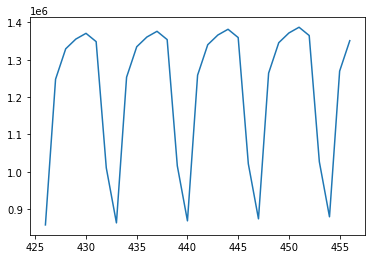

In [23]:
# representamos los valores de la predicción:
predictions_ago.plot()

In [25]:
# guardamos los datos de predicción de trafico en el mes de agosto.

predictions_ago.to_csv('Pred08Mod4trafMadridintM40.csv')

In [26]:
# trabajo terminado. Hemos utilizado 4 modelos y guardado 3 archivos para 
# visualizarlos despues y elegir el mejor para el uso de los datos predichos
# para el mes de agosto 2031.

In [27]:
# Trabajo de Mariano Ahijado García. TFM VIU. Master Big Data 2020-21.